In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wGr6Itk-k_YqHjtWcqom1k1eCn1ljd0GSRkAoTV0V5RAxccBx5Pqv8
Mounted at /content/drive


In [ ]:
train=np.load("./drive/My Drive/audio_train.npy")
test=np.load("./drive/My Drive/audio_test.npy")

In [ ]:
train_labels=pd.read_csv("./drive/My Drive/labels_train.csv")
sample_submission=pd.read_csv("./drive/My Drive/sample_submission.csv")

In [ ]:
train_labels

,id,label
0,0,5
1,1,1
2,2,1
3,3,0
4,4,9
...,...,...
937,937,9
938,938,1
939,939,1
940,940,5


In [ ]:
label = list(train_labels['label'])

y_train = np.empty([len(train),1])
for i in range(len(label)):
  y_train[i] = label[i]
y_train = np.array(y_train, dtype='uint8')

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)

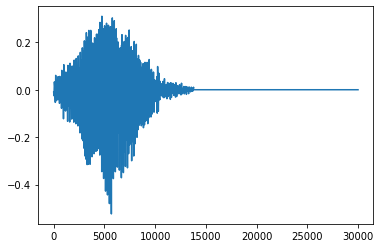

In [ ]:
plt.plot(train[2])

In [ ]:
print(train_labels.label.unique())

[5 1 0 9 4 6 7 3 8]


In [ ]:
print(sample_submission.label.unique())

[ 1  6  3  7  4  8  9  5  2  0 10]


In [ ]:
print(np.shape(test)[1])

30000


In [ ]:
verbose, epochs, batch_size = 0, 10, 32

In [ ]:
n_timesteps, n_features, n_outputs = train.shape[0], train.shape[1], train_labels.shape[0]

In [ ]:
n_timesteps

942

In [ ]:
train.shape[0],train.shape[1]

(942, 30000)

In [ ]:
train1=np.reshape(train,(train.shape[0],500,60))
train1.shape

(942, 500, 60)

In [ ]:
test1=np.reshape(test,(test.shape[0],500,60))
test1.shape

(558, 500, 60)

In [ ]:
train_labels.shape

(942, 2)

In [ ]:
train.shape[1]

30000

In [ ]:
model = models.Sequential()
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(500,60)))
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling1D(pool_size=15))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))



In [ ]:
model.summary()

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_108 (Conv1D)          (None, 498, 64)           11584     
_________________________________________________________________
conv1d_109 (Conv1D)          (None, 496, 64)           12352     
_________________________________________________________________
dropout_62 (Dropout)         (None, 496, 64)           0         
_________________________________________________________________
max_pooling1d_54 (MaxPooling (None, 33, 64)            0         
_________________________________________________________________
flatten_40 (Flatten)         (None, 2112)              0         
_________________________________________________________________
dense_95 (Dense)             (None, 100)               211300    
_________________________________________________________________
dense_96 (Dense)             (None, 100)             

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(train1, y_train, epochs=100)

Epoch 1/100
30/30 [==============================] - 0s 6ms/step - loss: 0.6562 - accuracy: 0.7887
Epoch 2/100
30/30 [==============================] - 0s 6ms/step - loss: 0.5539 - accuracy: 0.8110
Epoch 3/100
30/30 [==============================] - 0s 6ms/step - loss: 0.5113 - accuracy: 0.8429
Epoch 4/100
30/30 [==============================] - 0s 6ms/step - loss: 0.5094 - accuracy: 0.8386
Epoch 5/100
30/30 [==============================] - 0s 5ms/step - loss: 0.4463 - accuracy: 0.8493
Epoch 6/100
30/30 [==============================] - 0s 5ms/step - loss: 0.4937 - accuracy: 0.8482
Epoch 7/100
30/30 [==============================] - 0s 5ms/step - loss: 0.4124 - accuracy: 0.8747
Epoch 8/100
30/30 [==============================] - 0s 5ms/step - loss: 0.3409 - accuracy: 0.8949
Epoch 9/100
30/30 [==============================] - 0s 5ms/step - loss: 0.3287 - accuracy: 0.9023
Epoch 10/100
30/30 [==============================] - 0s 5ms/step - loss: 0.3843 - accuracy: 0.8747
Epoch 11/

In [ ]:
pred = model.predict(test1)

In [ ]:
np.argmax(pred[1])

9

In [ ]:
predLabel = np.empty([len(test),2],dtype=int)
for i in range(len(pred)):
  predLabel[i][0] = np.int(i)
  predLabel[i][1] = np.int(np.argmax(pred[i]))


In [ ]:
df = pd.DataFrame(predLabel, columns= ['id', 'label'])

df.to_csv (r'haiqzhu.csv', index = False, header=True)

In [ ]:
sample_submission

,id,label
0,0,1
1,1,6
2,2,3
3,3,7
4,4,4
...,...,...
553,553,6
554,554,0
555,555,2
556,556,9


In [ ]:
df

,id,label
0,0,5
1,1,9
2,2,4
3,3,1
4,4,4
...,...,...
553,553,1
554,554,5
555,555,5
556,556,7
